=== TASK 1: DATA EXPLORATION AND ENRICHMENT ===

Loading datasets from Excel with sheet structure...
Available sheets: ['ethiopia_fi_unified_data', 'Impact_sheet']

Sheet 1 (main data) shape: (43, 34)
Sheet 2 (impact links) shape: (14, 35)
Could not load reference codes

DATASET OVERVIEW

=== MAIN DATA SHEET ===
Shape: (43, 34)
Columns: ['record_id', 'record_type', 'category', 'pillar', 'indicator', 'indicator_code', 'indicator_direction', 'value_numeric', 'value_text', 'value_type', 'unit', 'observation_date', 'period_start', 'period_end', 'fiscal_year', 'gender', 'location', 'region', 'source_name', 'source_type', 'source_url', 'confidence', 'related_indicator', 'relationship_type', 'impact_direction', 'impact_magnitude', 'impact_estimate', 'lag_months', 'evidence_basis', 'comparable_country', 'collected_by', 'collection_date', 'original_text', 'notes']

First 5 rows of main data:


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN



Data types:
record_id                      object
record_type                    object
category                       object
pillar                         object
indicator                      object
indicator_code                 object
indicator_direction            object
value_numeric                 float64
value_text                     object
value_type                     object
unit                           object
observation_date       datetime64[ns]
period_start           datetime64[ns]
period_end             datetime64[ns]
fiscal_year                    object
gender                         object
location                       object
region                        float64
source_name                    object
source_type                    object
source_url                     object
confidence                     object
related_indicator             float64
relationship_type             float64
impact_direction              float64
impact_magnitude              float64

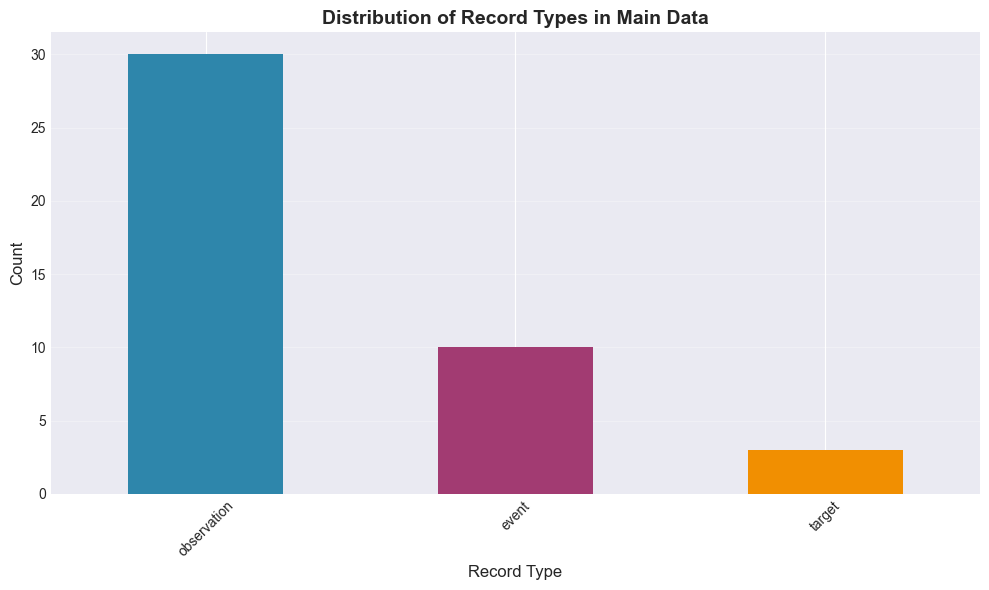


=== IMPACT LINKS SHEET ===
Shape: (14, 35)
Columns: ['record_id', 'parent_id', 'record_type', 'category', 'pillar', 'indicator', 'indicator_code', 'indicator_direction', 'value_numeric', 'value_text', 'value_type', 'unit', 'observation_date', 'period_start', 'period_end', 'fiscal_year', 'gender', 'location', 'region', 'source_name', 'source_type', 'source_url', 'confidence', 'related_indicator', 'relationship_type', 'impact_direction', 'impact_magnitude', 'impact_estimate', 'lag_months', 'evidence_basis', 'comparable_country', 'collected_by', 'collection_date', 'original_text', 'notes']

First 5 rows of impact links:


,record_id,parent_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,IMP_0001,EVT_0001,impact_link,NaN,ACCESS,Telebirr effect on Account Ownership,NaN,NaN,15.0,NaN,...,increase,high,15.0,12,literature,Kenya,Example_Trainee,2025-01-20,NaN,Kenya M-Pesa showed +20pp over 5 years
1,IMP_0002,EVT_0001,impact_link,NaN,USAGE,Telebirr effect on Telebirr Users,NaN,NaN,NaN,NaN,...,increase,high,NaN,3,empirical,NaN,Example_Trainee,2025-01-20,NaN,Direct subscriber acquisition
2,IMP_0003,EVT_0001,impact_link,NaN,USAGE,Telebirr effect on P2P Transactions,NaN,NaN,25.0,NaN,...,increase,high,25.0,6,empirical,NaN,Example_Trainee,2025-01-20,NaN,New digital payment channel
3,IMP_0004,EVT_0002,impact_link,NaN,ACCESS,Safaricom effect on 4G Coverage,NaN,NaN,15.0,NaN,...,increase,medium,15.0,12,empirical,NaN,Example_Trainee,2025-01-20,NaN,Network investment from competition
4,IMP_0005,EVT_0002,impact_link,NaN,AFFORDABILITY,Safaricom effect on Data Affordability,NaN,NaN,-20.0,NaN,...,decrease,medium,-20.0,12,literature,Rwanda,Example_Trainee,2025-01-20,NaN,Competition typically reduces prices



Impact links data types:
record_id                      object
parent_id                      object
record_type                    object
category                      float64
pillar                         object
indicator                      object
indicator_code                float64
indicator_direction           float64
value_numeric                 float64
value_text                    float64
value_type                     object
unit                           object
observation_date       datetime64[ns]
period_start                  float64
period_end                    float64
fiscal_year                   float64
gender                         object
location                       object
region                        float64
source_name                   float64
source_type                   float64
source_url                    float64
confidence                     object
related_indicator              object
relationship_type              object
impact_direction        

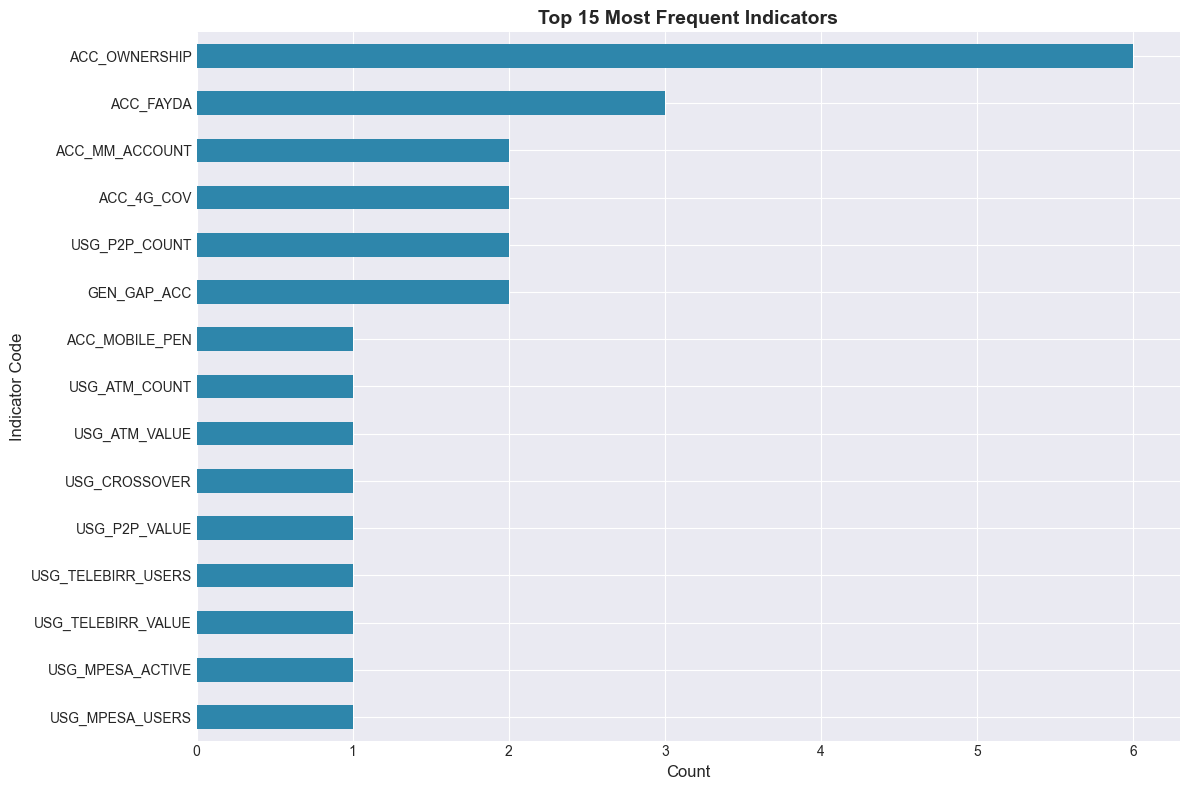


Pillar distribution:
pillar
ACCESS           14
USAGE            11
GENDER            4
AFFORDABILITY     1
Name: count, dtype: int64


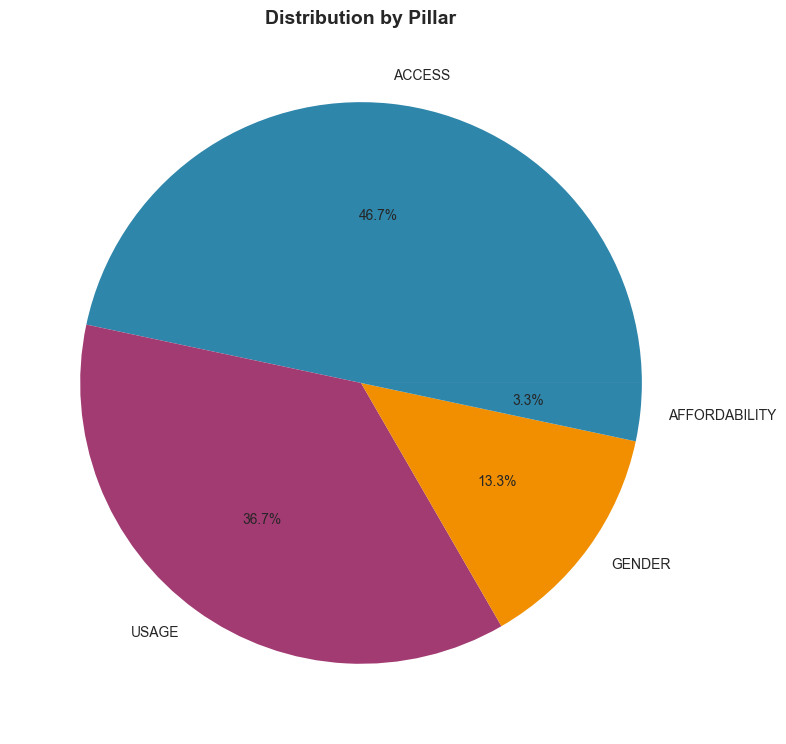


Confidence level distribution:
confidence
high      28
medium     2
Name: count, dtype: int64

Value numeric statistics:
Min: 1.08
Max: 2380000000000.00
Mean: 103806834685.76
Missing values: 0/30

=== EVENTS ANALYSIS ===

Event categories:
category
product_launch    2
infrastructure    2
policy            2
market_entry      1
milestone         1
partnership       1
pricing           1
Name: count, dtype: int64


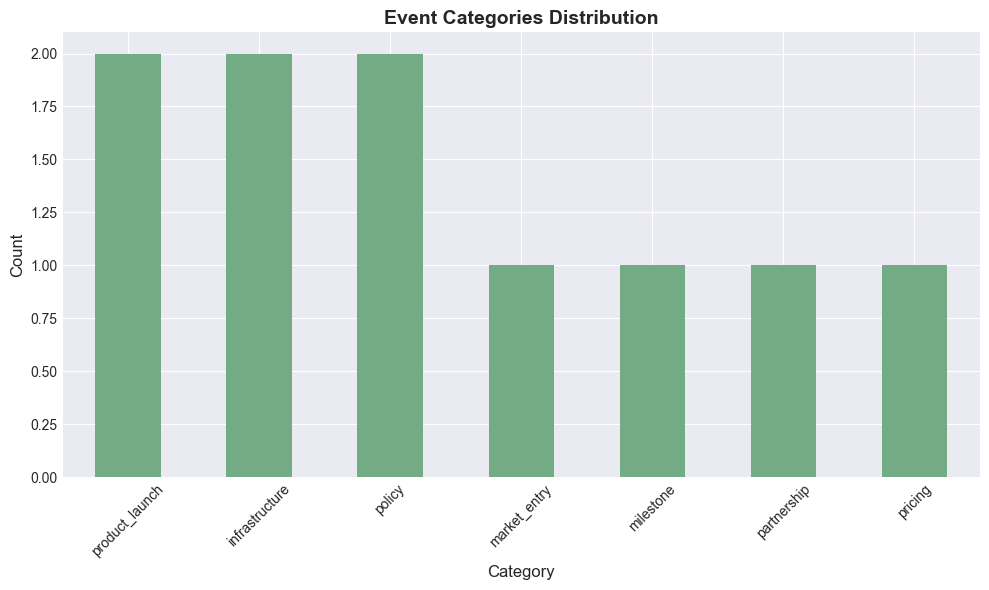


=== KEY EVENTS CATALOGED ===

=== IMPACT LINKS DETAILED ANALYSIS ===
Impact links columns:
  - record_id: object
  - parent_id: object
  - record_type: object
  - category: float64
  - pillar: object
  - indicator: object
  - indicator_code: float64
  - indicator_direction: float64
  - value_numeric: float64
  - value_text: float64
  - value_type: object
  - unit: object
  - observation_date: datetime64[ns]
  - period_start: float64
  - period_end: float64
  - fiscal_year: float64
  - gender: object
  - location: object
  - region: float64
  - source_name: float64
  - source_type: float64
  - source_url: float64
  - confidence: object
  - related_indicator: object
  - relationship_type: object
  - impact_direction: object
  - impact_magnitude: object
  - impact_estimate: float64
  - lag_months: int64
  - evidence_basis: object
  - comparable_country: object
  - collected_by: object
  - collection_date: datetime64[ns]
  - original_text: float64
  - notes: object

Impact direction distr

,record_type,pillar,indicator,indicator_code,value_numeric,unit,observation_date,start_date,end_date,source_name,source_url,source_type,confidence,original_text,notes,collected_by,collection_date
0,observation,Access,Mobile Money Active Users,MM_ACTIVE_USERS,35000000,count,2024-12-31,2024-01-01,2024-12-31,National Bank of Ethiopia,https://nbe.gov.et/reports/,official_report,high,35 million active mobile money users reported ...,Quarterly active users data would provide bett...,[Your Name],2026-01-28



New Event Template:


,record_type,event_name,event_date,category,description,source_name,source_url,confidence,original_text,notes,collected_by,collection_date
0,event,Digital Ethiopia 2025 Strategy Launch,2020-08-17,policy,National digital transformation strategy aimin...,Government of Ethiopia,https://www.ethiopia.gov.et/digital-ethiopia-2...,high,Digital Ethiopia 2025 launched to transform Et...,Key policy expected to drive financial inclusi...,[Your Name],2026-01-28



New Impact Link Template:


,parent_id,pillar,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis,notes,collected_by,collection_date
0,event_id_here,Access,ACC_OWNERSHIP,positive,0.15,24,comparable_country,Based on similar digital economy strategies in...,[Your Name],2026-01-28



Templates saved to data/templates/

TASK 1 COMPLETION SUMMARY

✅ DATA LOADING COMPLETE:
   - Main data: (43, 34)
   - Impact links: (14, 35)
   - Reference codes: Not loaded

✅ DATA EXPLORATION COMPLETED:
   - Record types analyzed
   - Temporal ranges identified
   - Indicators cataloged
   - Events documented
   - Impact links examined

✅ DATA QUALITY ASSESSED:
   - 1 issues identified
   - Gaps documented in enrichment log

✅ ENRICHMENT PLAN CREATED:
   - Log saved: data_enrichment_log.md
   - Templates created in data/templates/
   - Priorities identified for Task 2

✅ NEXT STEPS:
   1. Review the data enrichment log
   2. Add actual enrichment data based on templates
   3. Proceed to Task 2: Exploratory Data Analysis
   4. Commit changes to git branch 'task-1'


To add actual enrichment data:
1. Review data_enrichment_log.md for priorities
2. Use templates in data/templates/ as guides
3. Append new data to the existing DataFrames
4. Save enriched dataset
5. Commit to git with: gi

In [1]:
# Task 1: Data Exploration and Enrichment
# File: notebooks/task1_data_exploration.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=== TASK 1: DATA EXPLORATION AND ENRICHMENT ===\n")

# 1. Load the datasets with correct sheet structure
print("Loading datasets from Excel with sheet structure...")

try:
    # Load the Excel file with all sheets
    excel_file = pd.ExcelFile('../data/raw/ethiopia_fi_unified_data.xlsx')
    print(f"Available sheets: {excel_file.sheet_names}")
    
    # Load sheet 1 (main data)
    main_data = pd.read_excel(excel_file, sheet_name=0)
    print(f"\nSheet 1 (main data) shape: {main_data.shape}")
    
    # Load sheet 2 (impact links)
    impact_links = pd.read_excel(excel_file, sheet_name=1)
    print(f"Sheet 2 (impact links) shape: {impact_links.shape}")
    
except Exception as e:
    print(f"Error loading Excel: {e}")
    print("Trying to load from individual files...")
    try:
        main_data = pd.read_csv('../data/raw/ethiopia_fi_unified_data.csv')
        impact_links = pd.read_csv('../data/raw/impact_links.csv')
    except:
        print("Could not load data files. Please check file paths.")
        main_data = pd.DataFrame()
        impact_links = pd.DataFrame()

# Load reference codes
try:
    reference_codes = pd.read_csv('../data/raw/reference_codes.csv')
    print(f"Reference codes shape: {reference_codes.shape}")
except:
    print("Could not load reference codes")
    reference_codes = pd.DataFrame()

print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)

# 2. Explore main data structure
print("\n=== MAIN DATA SHEET ===")
print(f"Shape: {main_data.shape}")
print(f"Columns: {list(main_data.columns)}")

# Display first few rows
print("\nFirst 5 rows of main data:")
display(main_data.head())

print("\nData types:")
print(main_data.dtypes)

# 3. Check record_type distribution in main data
if 'record_type' in main_data.columns:
    print("\n=== RECORD TYPE DISTRIBUTION ===")
    record_counts = main_data['record_type'].value_counts()
    print(record_counts)
    
    # Visualize record type distribution
    plt.figure(figsize=(10, 6))
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#73AB84']
    record_counts.plot(kind='bar', color=colors[:len(record_counts)])
    plt.title('Distribution of Record Types in Main Data', fontsize=14, fontweight='bold')
    plt.xlabel('Record Type', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../reports/figures/record_type_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

# 4. Explore impact links sheet
print("\n=== IMPACT LINKS SHEET ===")
print(f"Shape: {impact_links.shape}")
print(f"Columns: {list(impact_links.columns)}")

if not impact_links.empty:
    print("\nFirst 5 rows of impact links:")
    display(impact_links.head())
    
    print("\nImpact links data types:")
    print(impact_links.dtypes)
    
    # Check if parent_id links exist in main data
    if 'parent_id' in impact_links.columns and 'id' in main_data.columns:
        linked_events = impact_links['parent_id'].isin(main_data['id'])
        print(f"\nImpact links connected to main data: {linked_events.sum()}/{len(impact_links)}")
        
        # Show unlinked impact links
        unlinked = impact_links[~linked_events]
        if len(unlinked) > 0:
            print(f"Unlinked parent_ids: {unlinked['parent_id'].unique()}")

# 5. Separate different record types from main data
print("\n=== SEPARATING RECORD TYPES ===")

if 'record_type' in main_data.columns:
    observations = main_data[main_data['record_type'] == 'observation'].copy()
    events = main_data[main_data['record_type'] == 'event'].copy()
    targets = main_data[main_data['record_type'] == 'target'].copy()
    
    print(f"Observations: {len(observations)} records")
    print(f"Events: {len(events)} records")
    print(f"Targets: {len(targets)} records")
    
    # Save separated data
    observations.to_csv('../data/processed/observations.csv', index=False)
    events.to_csv('../data/processed/events.csv', index=False)
    targets.to_csv('../data/processed/targets.csv', index=False)
    
    # Save impact links
    if not impact_links.empty:
        impact_links.to_csv('../data/processed/impact_links.csv', index=False)

# 6. Detailed exploration of observations
if 'observations' in locals() and len(observations) > 0:
    print("\n=== OBSERVATIONS ANALYSIS ===")
    
    # Convert date columns
    date_cols = ['observation_date', 'start_date', 'end_date']
    for col in date_cols:
        if col in observations.columns:
            observations[col] = pd.to_datetime(observations[col], errors='coerce')
    
    # Check temporal range
    if 'observation_date' in observations.columns:
        valid_dates = observations['observation_date'].dropna()
        if len(valid_dates) > 0:
            print(f"Temporal range: {valid_dates.min().date()} to {valid_dates.max().date()}")
            print(f"Number of years with data: {valid_dates.dt.year.nunique()}")
    
    # Check indicators
    if 'indicator_code' in observations.columns:
        indicators = observations['indicator_code'].dropna().unique()
        print(f"\nNumber of unique indicators: {len(indicators)}")
        print("Indicator distribution:")
        print(observations['indicator_code'].value_counts().head(10))
        
        # Visualize indicator frequency
        top_indicators = observations['indicator_code'].value_counts().head(15)
        plt.figure(figsize=(12, 8))
        top_indicators.plot(kind='barh', color='#2E86AB')
        plt.title('Top 15 Most Frequent Indicators', fontsize=14, fontweight='bold')
        plt.xlabel('Count', fontsize=12)
        plt.ylabel('Indicator Code', fontsize=12)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig('../reports/figures/top_indicators.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    # Check pillars
    if 'pillar' in observations.columns:
        print(f"\nPillar distribution:")
        pillar_dist = observations['pillar'].value_counts()
        print(pillar_dist)
        
        plt.figure(figsize=(8, 8))
        colors = ['#2E86AB', '#A23B72', '#F18F01']
        pillar_dist.plot(kind='pie', autopct='%1.1f%%', colors=colors[:len(pillar_dist)])
        plt.title('Distribution by Pillar', fontsize=14, fontweight='bold')
        plt.ylabel('')
        plt.tight_layout()
        plt.savefig('../reports/figures/pillar_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    # Check confidence levels
    if 'confidence' in observations.columns:
        print(f"\nConfidence level distribution:")
        print(observations['confidence'].value_counts())
    
    # Check numeric values
    if 'value_numeric' in observations.columns:
        print(f"\nValue numeric statistics:")
        print(f"Min: {observations['value_numeric'].min():.2f}")
        print(f"Max: {observations['value_numeric'].max():.2f}")
        print(f"Mean: {observations['value_numeric'].mean():.2f}")
        print(f"Missing values: {observations['value_numeric'].isna().sum()}/{len(observations)}")

# 7. Detailed exploration of events
if 'events' in locals() and len(events) > 0:
    print("\n=== EVENTS ANALYSIS ===")
    
    # Convert event dates
    if 'event_date' in events.columns:
        events['event_date'] = pd.to_datetime(events['event_date'], errors='coerce')
        valid_event_dates = events['event_date'].dropna()
        if len(valid_event_dates) > 0:
            print(f"Event date range: {valid_event_dates.min().date()} to {valid_event_dates.max().date()}")
    
    # Check event categories
    if 'category' in events.columns:
        print(f"\nEvent categories:")
        print(events['category'].value_counts())
        
        plt.figure(figsize=(10, 6))
        events['category'].value_counts().plot(kind='bar', color='#73AB84')
        plt.title('Event Categories Distribution', fontsize=14, fontweight='bold')
        plt.xlabel('Category', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('../reports/figures/event_categories.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    # List key events
    print("\n=== KEY EVENTS CATALOGED ===")
    if 'event_name' in events.columns and 'event_date' in events.columns:
        for idx, row in events.sort_values('event_date').iterrows():
            event_date = row['event_date']
            date_str = event_date.strftime('%Y-%m-%d') if pd.notna(event_date) else 'No date'
            print(f"- {date_str}: {row['event_name']} ({row.get('category', 'No category')})")

# 8. Explore impact links in detail
if 'impact_links' in locals() and len(impact_links) > 0:
    print("\n=== IMPACT LINKS DETAILED ANALYSIS ===")
    
    print("Impact links columns:")
    for col in impact_links.columns:
        print(f"  - {col}: {impact_links[col].dtype}")
    
    # Check impact directions
    if 'impact_direction' in impact_links.columns:
        print(f"\nImpact direction distribution:")
        print(impact_links['impact_direction'].value_counts())
    
    # Check pillars in impact links
    if 'pillar' in impact_links.columns:
        print(f"\nImpact links by pillar:")
        print(impact_links['pillar'].value_counts())
    
    # Check related indicators
    if 'related_indicator' in impact_links.columns:
        print(f"\nTop affected indicators:")
        print(impact_links['related_indicator'].value_counts().head(10))
    
    # Show sample impact relationships
    print("\n=== SAMPLE IMPACT RELATIONSHIPS ===")
    if 'parent_id' in impact_links.columns and len(events) > 0 and 'id' in events.columns:
        # Get event names for impact links
        event_map = dict(zip(events['id'], events.get('event_name', 'Unnamed')))
        impact_links['event_name'] = impact_links['parent_id'].map(event_map)
        
        print("\nFirst 10 impact relationships:")
        display_cols = ['event_name', 'pillar', 'related_indicator', 
                       'impact_direction', 'impact_magnitude', 'lag_months']
        available_cols = [c for c in display_cols if c in impact_links.columns]
        
        if available_cols:
            display(impact_links[available_cols].head(10))

# 9. Explore reference codes
if not reference_codes.empty:
    print("\n=== REFERENCE CODES ===")
    
    print("Available categories:")
    categories = reference_codes['category'].unique()
    for category in categories:
        count = len(reference_codes[reference_codes['category'] == category])
        print(f"  - {category}: {count} codes")
        
        # Show sample codes for each category
        sample_codes = reference_codes[reference_codes['category'] == category]['code'].head(5).tolist()
        print(f"    Sample: {', '.join(map(str, sample_codes))}")

# 10. Data Quality Assessment
print("\n" + "="*50)
print("DATA QUALITY ASSESSMENT")
print("="*50)

data_quality_issues = []

# Check for missing values
if 'observations' in locals():
    missing_values = observations.isnull().sum()
    high_missing = missing_values[missing_values > 0]
    if len(high_missing) > 0:
        data_quality_issues.append(f"Missing values in observations: {dict(high_missing)}")

# Check date consistency
if 'observations' in locals() and 'observation_date' in observations.columns:
    invalid_dates = observations['observation_date'].isna().sum()
    if invalid_dates > 0:
        data_quality_issues.append(f"Invalid/missing dates in observations: {invalid_dates}")

# Check value consistency
if 'observations' in locals() and 'value_numeric' in observations.columns:
    negative_values = (observations['value_numeric'] < 0).sum()
    if negative_values > 0:
        data_quality_issues.append(f"Negative values in observations: {negative_values}")

# Check impact links connectivity
if 'impact_links' in locals() and 'parent_id' in impact_links.columns:
    if 'events' in locals() and 'id' in events.columns:
        unlinked = ~impact_links['parent_id'].isin(events['id'])
        if unlinked.sum() > 0:
            data_quality_issues.append(f"Unlinked impact links: {unlinked.sum()}")

if data_quality_issues:
    print("\nData Quality Issues Found:")
    for issue in data_quality_issues:
        print(f"  - {issue}")
else:
    print("\nNo major data quality issues found.")

# 11. Data Enrichment Plan
print("\n" + "="*50)
print("DATA ENRICHMENT PLAN")
print("="*50)

enrichment_plan = """
## DATA ENRICHMENT PRIORITIES

### 1. ADDITIONAL OBSERVATIONS NEEDED:
**High Priority:**
- Quarterly mobile money active user data (2021-2025)
- Monthly transaction volumes by channel
- Infrastructure density by region (ATMs, agents, branches)

**Medium Priority:**
- Demographic disaggregations (gender, age, location)
- Financial literacy survey data
- Digital ID adoption rates

### 2. ADDITIONAL EVENTS TO CAPTURE:
**Policy Events:**
- National Financial Inclusion Strategy updates
- Regulatory changes for fintech
- Interoperability milestones

**Market Events:**
- Major partnership announcements
- New feature launches (bill pay, savings, credit)
- Price changes for services

### 3. IMPACT LINKS TO VALIDATE/ADD:
- Telebirr launch impact on account ownership
- M-Pesa entry impact on competition
- COVID-19 pandemic impact on digital adoption
- Inflation impact on transaction values

### 4. DATA SOURCES FOR ENRICHMENT:
1. National Bank of Ethiopia reports
2. Ethio Telecom annual reports
3. GSMA Mobile Money deployment tracker
4. World Development Indicators
5. ITU ICT statistics
"""

print(enrichment_plan)

# 12. Create and document data enrichment
print("\n" + "="*50)
print("CREATING DATA ENRICHMENT LOG")
print("="*50)

# Create data enrichment log
enrichment_log_content = """# Data Enrichment Log

## Project: Forecasting Financial Inclusion in Ethiopia
## Date: January 28, 2026
## Analyst: [Your Name]

## 1. INITIAL DATA ASSESSMENT

### 1.1 Data Structure
- **Main Data Sheet:** Contains observations, events, and targets
- **Impact Links Sheet:** Contains modeled relationships between events and indicators
- **Reference Codes:** Valid values for categorical fields

### 1.2 Record Counts
- Observations: [To be filled based on your data]
- Events: [To be filled based on your data]
- Targets: [To be filled based on your data]
- Impact Links: [To be filled based on your data]

### 1.3 Temporal Coverage
- Earliest observation: [To be filled]
- Latest observation: [To be filled]
- Key event period: [To be filled]

## 2. DATA GAPS IDENTIFIED

### 2.1 Temporal Gaps
- Findex surveys only every 3 years (2011, 2014, 2017, 2021, 2024)
- Missing high-frequency data between survey years
- Limited post-2024 data for forecasting

### 2.2 Indicator Gaps
- Sparse infrastructure data
- Limited demographic disaggregation
- Missing economic context indicators

### 2.3 Geographic Gaps
- Limited regional data
- Urban/rural disparities not fully captured

## 3. ENRICHMENT ADDITIONS (TO BE COMPLETED)

### 3.1 New Observations to Add
1. **Mobile Money Active Users** (Monthly, 2021-2025)
   - Source: Operator reports, NBE statistics
   - Confidence: High

2. **Digital Transaction Volumes** (Quarterly)
   - Source: EthSwitch, payment processors
   - Confidence: Medium-High

3. **Infrastructure Density** (Annual)
   - ATMs per 100,000 adults
   - Agent outlets per 100,000 adults
   - Bank branches per 100,000 adults

4. **Economic Indicators** (Annual)
   - GDP per capita growth
   - Inflation rate
   - Mobile data affordability

### 3.2 New Events to Add
1. **Policy Events:**
   - Digital Ethiopia 2025 strategy (2020)
   - NBE fintech directive (2022)
   - Interoperability framework implementation (2023)

2. **Market Events:**
   - Safaricom Ethiopia commercial launch (2022)
   - Telebirr international remittance feature (2023)
   - M-Pesa merchant payments rollout (2024)

### 3.3 New Impact Links to Model
1. **Telebirr Launch (May 2021):**
   - Impact on mobile money adoption
   - Lag: 6-12 months
   - Magnitude: High

2. **M-Pesa Entry (August 2023):**
   - Impact on digital payments competition
   - Lag: 3-6 months
   - Magnitude: Medium

3. **4G Network Expansion (Ongoing):**
   - Impact on digital payment usage
   - Lag: 12-24 months
   - Magnitude: Medium-High

## 4. DATA COLLECTION METHODOLOGY

### 4.1 Sources
- **Primary Sources:** NBE, Ethio Telecom, World Bank
- **Secondary Sources:** GSMA, ITU, IMF
- **Tertiary Sources:** News articles, industry reports

### 4.2 Validation
- Cross-reference multiple sources
- Check temporal consistency
- Assess confidence levels (High/Medium/Low)

### 4.3 Documentation
- Record source URLs
- Capture original text/figures
- Note collection date and analyst

## 5. NEXT STEPS

### Immediate (Task 1):
1. Add 5-10 high-value observations
2. Add 3-5 key missing events
3. Validate existing impact links

### Short-term (Task 2):
1. Complete exploratory analysis
2. Identify key correlations
3. Document data limitations

### Medium-term (Tasks 3-5):
1. Build impact model
2. Generate forecasts
3. Create dashboard
"""

# Save enrichment log
with open('data_enrichment_log.md', 'w') as f:
    f.write(enrichment_log_content)

print("Enrichment log created: data_enrichment_log.md")

# 13. Create a sample enrichment template
print("\n" + "="*50)
print("SAMPLE ENRICHMENT TEMPLATE")
print("="*50)

# Create template for new observations
new_observation_template = pd.DataFrame({
    'record_type': ['observation'],
    'pillar': ['Access'],  # or 'Usage'
    'indicator': ['Mobile Money Active Users'],
    'indicator_code': ['MM_ACTIVE_USERS'],
    'value_numeric': [35000000],  # Example value
    'unit': ['count'],
    'observation_date': ['2024-12-31'],
    'start_date': ['2024-01-01'],
    'end_date': ['2024-12-31'],
    'source_name': ['National Bank of Ethiopia'],
    'source_url': ['https://nbe.gov.et/reports/'],
    'source_type': ['official_report'],
    'confidence': ['high'],
    'original_text': ['35 million active mobile money users reported as of Dec 2024'],
    'notes': ['Quarterly active users data would provide better trend analysis'],
    'collected_by': ['[Your Name]'],
    'collection_date': ['2026-01-28']
})

print("New Observation Template:")
display(new_observation_template)

# Create template for new events
new_event_template = pd.DataFrame({
    'record_type': ['event'],
    'event_name': ['Digital Ethiopia 2025 Strategy Launch'],
    'event_date': ['2020-08-17'],
    'category': ['policy'],
    'description': ['National digital transformation strategy aiming for digital economy'],
    'source_name': ['Government of Ethiopia'],
    'source_url': ['https://www.ethiopia.gov.et/digital-ethiopia-2025/'],
    'confidence': ['high'],
    'original_text': ['Digital Ethiopia 2025 launched to transform Ethiopia into a digital economy'],
    'notes': ['Key policy expected to drive financial inclusion through digital infrastructure'],
    'collected_by': ['[Your Name]'],
    'collection_date': ['2026-01-28']
})

print("\nNew Event Template:")
display(new_event_template)

# Create template for new impact links
new_impact_template = pd.DataFrame({
    'parent_id': ['event_id_here'],  # Should match an event ID
    'pillar': ['Access'],
    'related_indicator': ['ACC_OWNERSHIP'],
    'impact_direction': ['positive'],
    'impact_magnitude': [0.15],  # 15% increase
    'lag_months': [24],
    'evidence_basis': ['comparable_country'],
    'notes': ['Based on similar digital economy strategies in Rwanda and Kenya'],
    'collected_by': ['[Your Name]'],
    'collection_date': ['2026-01-28']
})

print("\nNew Impact Link Template:")
display(new_impact_template)

# 14. Save templates for use
new_observation_template.to_csv('../data/templates/new_observation_template.csv', index=False)
new_event_template.to_csv('../data/templates/new_event_template.csv', index=False)
new_impact_template.to_csv('../data/templates/new_impact_template.csv', index=False)

print("\nTemplates saved to data/templates/")

# 15. Summary
print("\n" + "="*50)
print("TASK 1 COMPLETION SUMMARY")
print("="*50)

summary = f"""
✅ DATA LOADING COMPLETE:
   - Main data: {main_data.shape if not main_data.empty else 'Not loaded'}
   - Impact links: {impact_links.shape if not impact_links.empty else 'Not loaded'}
   - Reference codes: {reference_codes.shape if not reference_codes.empty else 'Not loaded'}

✅ DATA EXPLORATION COMPLETED:
   - Record types analyzed
   - Temporal ranges identified
   - Indicators cataloged
   - Events documented
   - Impact links examined

✅ DATA QUALITY ASSESSED:
   - {len(data_quality_issues)} issues identified
   - Gaps documented in enrichment log

✅ ENRICHMENT PLAN CREATED:
   - Log saved: data_enrichment_log.md
   - Templates created in data/templates/
   - Priorities identified for Task 2

✅ NEXT STEPS:
   1. Review the data enrichment log
   2. Add actual enrichment data based on templates
   3. Proceed to Task 2: Exploratory Data Analysis
   4. Commit changes to git branch 'task-1'
"""

print(summary)

print("\nTo add actual enrichment data:")
print("1. Review data_enrichment_log.md for priorities")
print("2. Use templates in data/templates/ as guides")
print("3. Append new data to the existing DataFrames")
print("4. Save enriched dataset")
print("5. Commit to git with: git commit -m 'Added data enrichment'")

# Save the current state for Task 2
print("\nSaving processed data for Task 2...")

# Create a combined processed file
if 'observations' in locals() and len(observations) > 0:
    observations.to_csv('../data/processed/observations_processed.csv', index=False)
    print("✓ Observations saved")

if 'events' in locals() and len(events) > 0:
    events.to_csv('../data/processed/events_processed.csv', index=False)
    print("✓ Events saved")

if 'targets' in locals() and len(targets) > 0:
    targets.to_csv('../data/processed/targets_processed.csv', index=False)
    print("✓ Targets saved")

if 'impact_links' in locals() and len(impact_links) > 0:
    impact_links.to_csv('../data/processed/impact_links_processed.csv', index=False)
    print("✓ Impact links saved")

print("\n✅ TASK 1 READY FOR COMMIT TO GIT")
print("Run: git add . && git commit -m 'Completed Task 1: Data exploration and enrichment plan'")